# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df.head()

age  physical_score  test_result
0 33.000          40.700            1
1 50.000          37.200            1
2 52.000          24.700            0
3 56.000          31.000            0
4 35.000          42.900            1

## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe().T

count   mean    std    min    25%    50%    75%    max
age            5000.000 51.609 11.287 18.000 43.000 51.000 60.000 90.000
physical_score 5000.000 32.760  8.170 -0.000 26.700 35.300 38.900 50.000
test_result    5000.000  0.600  0.490  0.000  0.000  1.000  1.000  1.000

In [6]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:>

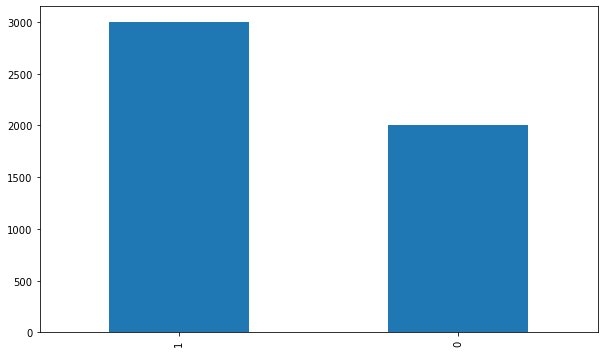

In [7]:
df['test_result'].value_counts().plot.bar()

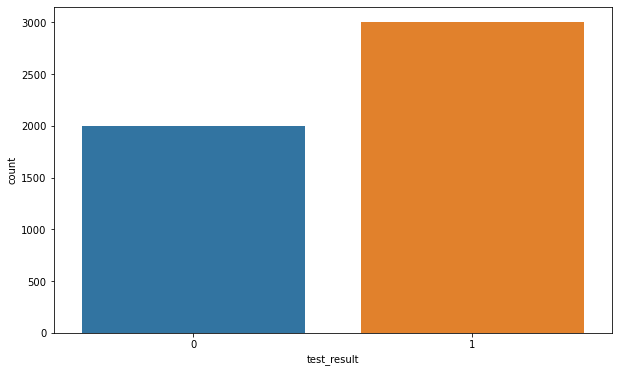

In [8]:
sns.countplot(df['test_result']);

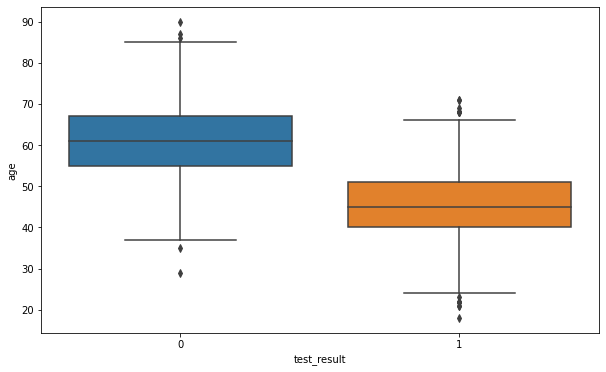

In [9]:
sns.boxplot(x='test_result', y='age', data=df);

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

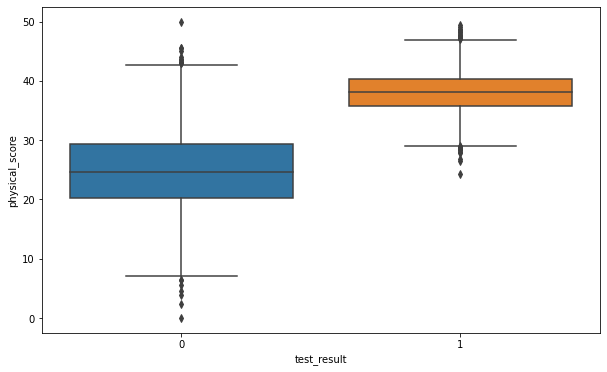

In [10]:
sns.boxplot(x='test_result',y='physical_score',data=df)

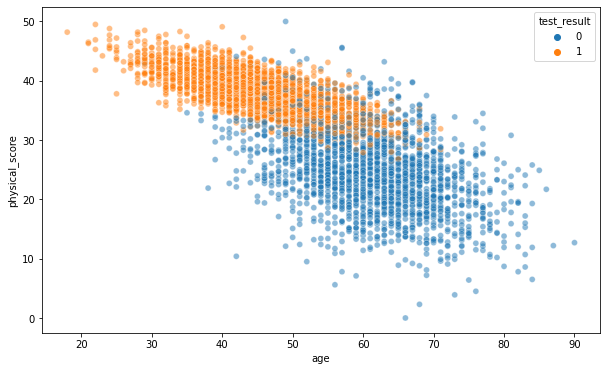

In [11]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.5); # alpha saydamlık verir

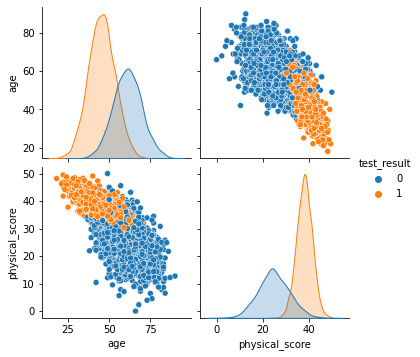

In [12]:
sns.pairplot(df, hue='test_result'); #hue onemli , anlaşılır olması için

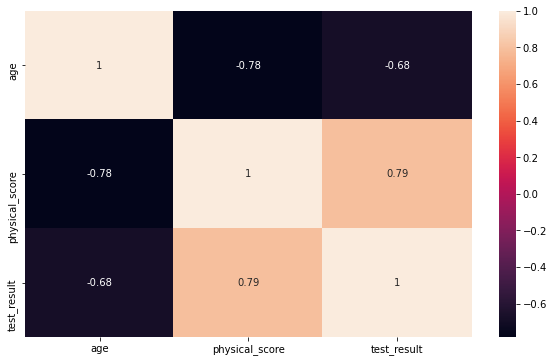

In [13]:
sns.heatmap(df.corr(), annot=True);

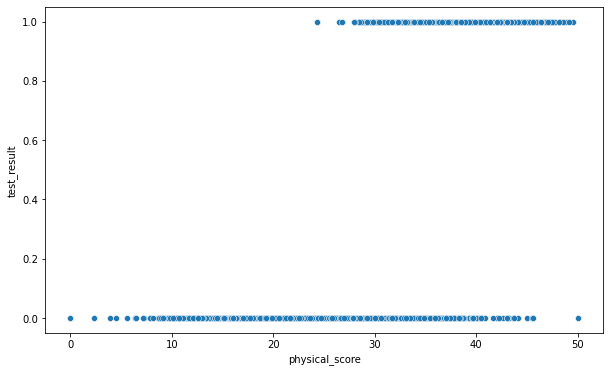

In [14]:
sns.scatterplot(x='physical_score',y='test_result',data=df);

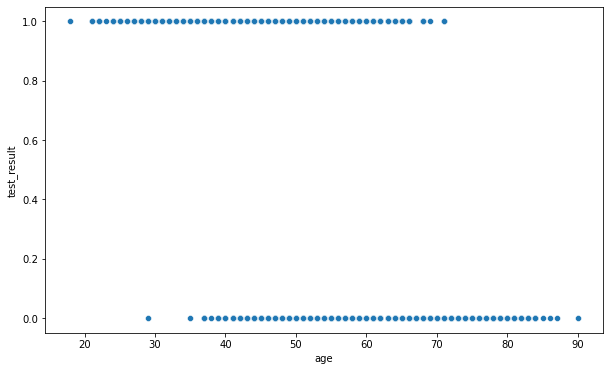

In [15]:
sns.scatterplot(x='age',y='test_result',data=df);

Easily discover new plot types with a google search! Searching for "3d matplotlib scatter plot" quickly takes you to: https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html

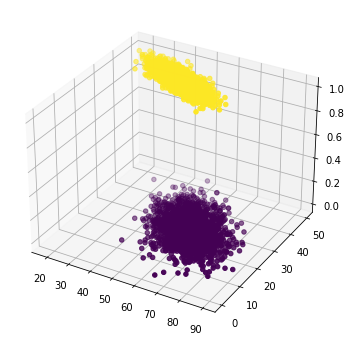

In [16]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result']);

# 

In [17]:
#!pip install plotly

https://plotly.com/python/3d-scatter-plots/

In [18]:
import plotly.express as px
fig = px.scatter_3d(df, x='age', y='physical_score', z='test_result',
              color='test_result')
fig.show()

## Train | Test Split and Scaling

In [19]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
 # train datamızın büyük olması daha iyi sonuç verir

In [22]:
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [24]:
from sklearn.linear_model import LogisticRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [25]:
#help(LogisticRegression) , hiperparametrelere bakılır 

In [26]:
log_model = LogisticRegression()

In [27]:
log_model.fit(X_train_scaled, y_train) # scale edilmiş X değerlerimi eğittim

LogisticRegression()

In [28]:
log_model.coef_ # katsayılar

array([[-0.94953524,  3.45991194]])

In [29]:
log_model.intercept_ 

array([0.48867341])

In [30]:
df.head() # katsayılar nereye gidiyor mesela -0,94 age'e 3,45 pyhsical_score'a gider

age  physical_score  test_result
0 33.000          40.700            1
1 50.000          37.200            1
2 52.000          24.700            0
3 56.000          31.000            0
4 35.000          42.900            1

In [31]:
y_pred = log_model.predict(X_test_scaled)
y_pred

# classification problemi oldugu için 0 ve 1 döndürdü

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [32]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

# olasılıklarımıza baktık : 2.38434328e-02, 0 olma olasılığı
# 9.76156567e-01, 1 olma olasılığı ikisinin toplamı 1 yapar

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [33]:
# X_test + y_yest + y_pred_proba + y_pred

In [34]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

age  physical_score  test_result
1718 39.000          37.800            1
2511 45.000          38.700            1
345  56.000          21.800            0
2521 40.000          44.000            1
54   64.000          25.400            0
...     ...             ...          ...
4770 46.000          37.700            1
188  59.000          36.500            1
3335 54.000          22.800            0
4583 58.000          20.500            0
3208 48.000          24.700            0

[500 rows x 3 columns]

In [35]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

age  physical_score  test_result  pred_proba
1718 39.000          37.800            1       0.976
2511 45.000          38.700            1       0.973
345  56.000          21.800            0       0.011
2521 40.000          44.000            1       0.998
54   64.000          25.400            0       0.025
...     ...             ...          ...         ...
4770 46.000          37.700            1       0.956
188  59.000          36.500            1       0.813
3335 54.000          22.800            0       0.019
4583 58.000          20.500            0       0.005
3208 48.000          24.700            0       0.069

[500 rows x 4 columns]

In [36]:
test_data["pred"] = y_pred
test_data

age  physical_score  test_result  pred_proba  pred
1718 39.000          37.800            1       0.976     1
2511 45.000          38.700            1       0.973     1
345  56.000          21.800            0       0.011     0
2521 40.000          44.000            1       0.998     1
54   64.000          25.400            0       0.025     0
...     ...             ...          ...         ...   ...
4770 46.000          37.700            1       0.956     1
188  59.000          36.500            1       0.813     1
3335 54.000          22.800            0       0.019     0
4583 58.000          20.500            0       0.005     0
3208 48.000          24.700            0       0.069     0

[500 rows x 5 columns]

In [37]:
test_data.sample(10)

age  physical_score  test_result  pred_proba  pred
805  49.000          38.800            1       0.964     1
669  46.000          37.600            1       0.954     1
1001 77.000          18.300            0       0.000     0
3406 43.000          36.100            1       0.934     1
4677 56.000          31.100            1       0.362     0
4709 52.000          38.000            1       0.937     1
2974 64.000          17.600            0       0.001     0
4327 46.000          41.500            1       0.991     1
1037 37.000          40.100            1       0.992     1
651  35.000          40.400            1       0.994     1

## Model Performance on Classification Tasks

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [39]:
confusion_matrix(y_test,y_pred) # y test ve tahmin değerlerimi vermem gerekiyor

array([[172,  21],
       [ 14, 293]], dtype=int64)

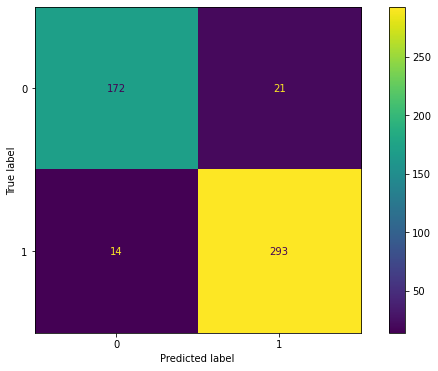

In [40]:
plot_confusion_matrix(log_model, X_test_scaled, y_test); # modelimi , scale edilmiş x ve y test değerlerimi veriyorum

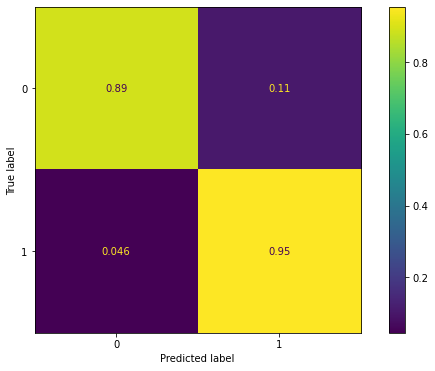

In [41]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='true');
# içine neyi yazarsam onun oranlarını verir


In [42]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [43]:
!pip install yellowbrick

In [44]:
### !conda install -c districtdatalabs yellowbrick

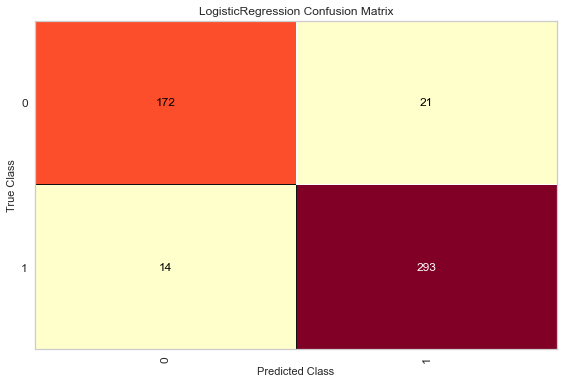

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [45]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(log_model)
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_scaled, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test_scaled, y_test)
cm.show()

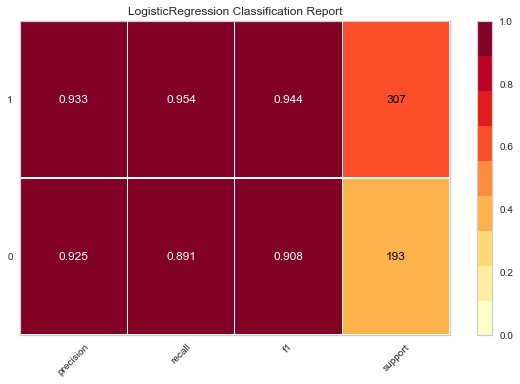

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [46]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(log_model, support=True)
visualizer.fit(X_train_scaled, y_train)        # Fit the visualizer and the model
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show()

In [47]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score 
# bu skorları manuel de alabiliriz

In [48]:
accuracy_score(y_test,y_pred)

0.93

In [49]:
log_model.score(X_test_scaled, y_test)

0.93

In [50]:
precision_score(y_test, y_pred)

0.9331210191082803

In [51]:
recall_score(y_test, y_pred)

0.9543973941368078

In [52]:
f1_score(y_test,y_pred, average = "weighted") # hangi metriğe bakacaksak ona gore değerlendirmeliyiz

0.9297480869650194

## Cross Validate

bu ilkel skorum modelimi temsil ediyor mu?

In [53]:
from sklearn.model_selection import cross_val_score, cross_validate

In [54]:
model = LogisticRegression()

scores = cross_val_score(model, X_train_scaled, y_train, cv=10)
print('Cross-Validation Mean of Accuracy Scores', scores.mean())
print("")
print(scores)

Cross-Validation Mean of Accuracy Scores 0.9146666666666666

[0.9        0.92444444 0.93555556 0.93111111 0.93777778 0.90222222
 0.89777778 0.91111111 0.89111111 0.91555556]


In [55]:
model = LogisticRegression()

scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring="f1_weighted") #f1 in agırlıklı ortalamasına göre 
print('Cross-Validation Mean of f1_weighted Scores', scores.mean())
print("")
print(scores)

Cross-Validation Mean of f1_weighted Scores 0.9142157347468058

[0.89891354 0.92405195 0.93485539 0.93101428 0.93765977 0.90261051
 0.89675804 0.91010501 0.89115971 0.91502915]


In [56]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [57]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled,
                        y_train, 
                        scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
 # cross validate içinde birden fazla skoru tahmin etmede kullanılır 
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision_weighted  \
1      0.024       0.010          0.900                    0.901   
2      0.013       0.007          0.924                    0.925   
3      0.009       0.007          0.936                    0.938   
4      0.011       0.006          0.931                    0.931   
5      0.010       0.006          0.938                    0.938   
6      0.011       0.006          0.902                    0.904   
7      0.010       0.006          0.898                    0.899   
8      0.010       0.006          0.911                    0.913   
9      0.011       0.006          0.891                    0.891   
10     0.010       0.005          0.916                    0.916   

    test_recall_weighted  test_f1_weighted  
1                  0.900             0.899  
2                  0.924             0.924  
3                  0.936             0.935  
4                  0.931             0.931  
5                  0.938             0.938  
6                  0.902             0.903  
7                  0.898             0.897  
8                  0.911             0.910  
9                  0.891             0.891  
10                 0.916             0.915

In [58]:
df_scores.mean()[2:]

test_accuracy             0.915
test_precision_weighted   0.916
test_recall_weighted      0.915
test_f1_weighted          0.914
dtype: float64

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

Purpose of ROC Curve:
    1. Analysing the strength/predictive power of a classifier. 
    --- Tahmin Gücünü gösterir
    --- auc skoru yüksek olan secilir bu : ayrımları daha iyi yaptıgını ifade eder
    2. Determining optimal threshold.
    3. Comparing two models (using Area Under the Curve).

AUC represents a degree or measure of separability. It tells us how much the model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting the probability of class YES higher than the probability of class NO.

The ROC Curve was first used during World War II for the analysis of radar signals. After the attack on Pearl Harbor, the US army began new research to improve the rate of detection of Japanese aircraft from their radar signals. Needless to say, they did not want to miss any of them. Neither did they wish to waste their resources on false alarms. They measured the ability of a radar receiver operator to make these predictions called the Receiver Operating Characteristic. That is the origin of the name. The purpose of the curve was similar to how we use it to improve our machine learning models now. The aim was to analyse the predictive power of the predictor in ensuring the detection of as many true positives as possible while minimizing false positives.

https://towardsdatascience.com/demystifying-roc-curves-df809474529a

In [88]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

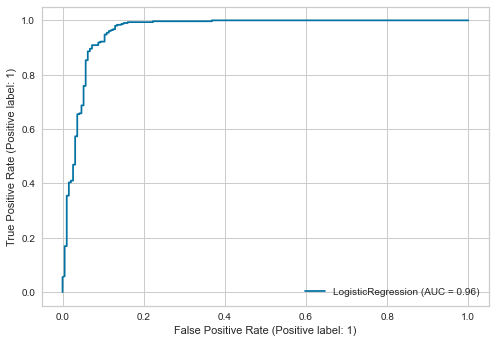

In [89]:
plot_roc_curve(log_model, X_test_scaled, y_test, response_method='auto');
# 0 ve 1i çok iyi ayırt edebilmiş 

ROC : olasılık değeri ile çizilir 

In [90]:
roc_auc_score(y_test, y_pred_proba[:,1])  # probanın 1 olma ihtimali 

0.9630132824762451

In [91]:
roc_auc_score(y_test, y_pred)

0.9227945519906837

In [92]:
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])

In [64]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.4124560000328866

In [65]:
roc_curve = {"fp_rate":fp_rate, "tp_rate":tp_rate, "thresholds":thresholds}
df_roc_curve = pd.DataFrame(roc_curve)
df_roc_curve

fp_rate  tp_rate  thresholds
0     0.000    0.000       2.000
1     0.000    0.003       1.000
2     0.000    0.055       0.999
3     0.005    0.059       0.999
4     0.005    0.169       0.996
..      ...      ...         ...
86    0.368    0.997       0.069
87    0.368    1.000       0.066
88    0.373    1.000       0.066
89    0.383    1.000       0.061
90    1.000    1.000       0.000

[91 rows x 3 columns]

In [66]:
optimal_idx = np.argmax(df_roc_curve.tp_rate - df_roc_curve.fp_rate)
optimal_threshold = df_roc_curve.thresholds[optimal_idx]
optimal_threshold

0.4124560000328866

In [67]:
df_roc_curve.iloc[optimal_idx]

fp_rate      0.130
tp_rate      0.980
thresholds   0.412
Name: 73, dtype: float64

In [68]:
test_data.head()

age  physical_score  test_result  pred_proba  pred
1718 39.000          37.800            1       0.976     1
2511 45.000          38.700            1       0.973     1
345  56.000          21.800            0       0.011     0
2521 40.000          44.000            1       0.998     1
54   64.000          25.400            0       0.025     0

In [69]:
test_data["pred2"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold else 0)

In [70]:
test_data[(test_data["pred_proba"]>0.4) & (test_data["pred_proba"]<0.6)]

age  physical_score  test_result  pred_proba  pred  pred2
618  63.000          33.400            1       0.454     0      1
3200 60.000          32.900            1       0.465     0      1
3731 57.000          31.900            1       0.422     0      1
480  41.000          28.600            0       0.410     0      0
1525 46.000          30.700            0       0.527     1      1
3209 61.000          32.600            1       0.412     0      1
172  54.000          32.500            1       0.549     1      1
1379 57.000          32.600            0       0.496     0      1
2415 58.000          33.100            1       0.528     1      1
133  55.000          31.900            0       0.464     0      1
247  56.000          33.000            1       0.559     1      1
231  55.000          31.600            1       0.433     0      1
3711 50.000          31.300            1       0.506     1      1
2551 54.000          31.100            1       0.401     0      0
3249 58.000          33.700            1       0.591     1      1
2561 62.000          33.100            0       0.444     0      1
4409 56.000          32.200            1       0.475     0      1
4487 58.000          32.200            1       0.433     0      1
801  52.000          31.600            1       0.495     0      1
1329 59.000          33.900            1       0.591     1      1
3958 53.000          32.500            1       0.569     1      1
4562 58.000          32.900            1       0.507     1      1
244  57.000          33.100            1       0.549     1      1
68   48.000          30.600            0       0.474     0      1
3597 58.000          33.100            1       0.528     1      1

In [71]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[172  21]
 [ 14 293]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [72]:
y_pred2 = test_data["pred2"]

In [73]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[168  25]
 [  6 301]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       193
           1       0.92      0.98      0.95       307

    accuracy                           0.94       500
   macro avg       0.94      0.93      0.93       500
weighted avg       0.94      0.94      0.94       500



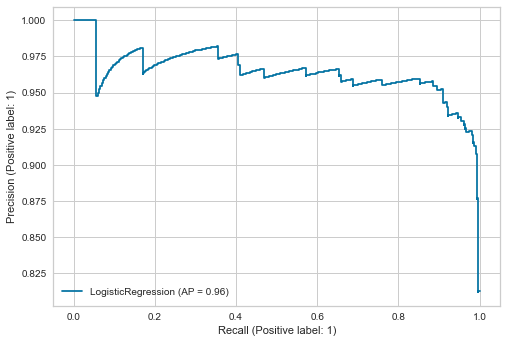

In [74]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test); # unbalanced datalarda bunu kullanmak tavsiye edilir

## Final Model and Model Deployment

In [75]:
scaler = StandardScaler().fit(X) 

In [76]:
import pickle
pickle.dump(scaler, open("scaler_hearing", 'wb'))

# herhangi bir yerde kullanabilmek adına scaler_hearing şeklinde kaydettim

In [77]:
X_scaled = scaler.transform(X) # tüm datayla scale ettim

In [78]:
final_model = LogisticRegression().fit(X_scaled, y)

In [79]:
pickle.dump(final_model, open("final_model_hearing", 'wb'))
# bunu da her yerde kullanabilmek adına kaydettim

In [80]:
my_dict = {"age": [20, 30, 40, 50, 60], 
           "physical_score": [50, 30, 20, 10, 5]}

# manuel olarak prediction oluşturdum

In [81]:
sample = pd.DataFrame(my_dict)
sample

age  physical_score
0   20              50
1   30              30
2   40              20
3   50              10
4   60               5

In [82]:
scaler_hearing = pickle.load(open("scaler_hearing", "rb")) #scaleri cagırdım

In [83]:
sample_scaled = scaler_hearing.transform(sample)
sample_scaled

#sampleın scale edilmiş hali

array([[-2.80075819,  2.11038956],
       [-1.91469467, -0.33789511],
       [-1.02863115, -1.56203745],
       [-0.14256762, -2.78617979],
       [ 0.7434959 , -3.39825096]])

In [84]:
final_model = pickle.load(open("final_model_hearing", "rb"))

In [85]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

#hem olasılık hem predictlerimi aldım ayrı ayrı

In [86]:
sample["pred"] = predictions
sample["pred_proba"] = predictions_proba[:,1]
sample

age  physical_score  pred  pred_proba
0   20              50     1       1.000
1   30              30     1       0.730
2   40              20     0       0.016
3   50              10     0       0.000
4   60               5     0       0.000